<a href="https://colab.research.google.com/github/saikiran-18/E-commerce-User-Behavior-Segmentation/blob/main/E_commerce_User_Behavior_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title:E-commerce User Behavior Segmentation

---
The core subject of this project is Machine Learning.

More specifically, it falls under the category of Unsupervised Machine Learning.

The reason it's "unsupervised" is that we are not trying to predict a specific outcome. Instead, we are using the algorithm (Hierarchical Clustering) to find hidden patterns and natural groupings in the data on its own. The model's job is to discover the customer segments, not to classify new customers into a pre-existing group.


Github Link : https://github.com/saikiran-18/E-commerce-User-Behavior-Segmentation.git



# Project Summary: E-commerce Customer Segmentation

---



This project's goal was to understand customer behavior using sales data. We used a technique called **Hierarchical Clustering** to group customers into different segments.

First, we prepared the data by calculating three key metrics for each customer:

* **Recency:** How recently they made a purchase.
* **Frequency:** How often they buy.
* **Monetary:** How much money they spend.

Based on these metrics, we identified three main customer groups:

* **High-Value Champions:** Your most loyal and profitable customers who buy often and spend a lot.
* **At-Risk Customers:** Customers who haven't shopped in a long time and have a low purchase history.
* **New Customers:** Recent shoppers with a moderate spending history.

By understanding these groups, a business can create targeted marketing strategies, like offering loyalty rewards to champions or sending special discounts to at-risk customers, to increase sales and improve customer relationships.

#1. Data Preparation
This phase focuses on getting the raw data ready for clustering.

---



##a. Load and Inspect the Data

---


First, Let's load the dataset and perform an initial inspection to understand its structure.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('Online Retail.xlsx')

# Display the first few rows
print(df.head())

# Get information about the DataFrame (data types, non-null counts)
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

##b. Data Cleaning
---
Now, Let's clean the data by handling missing values and ensuring data integrity. The CustomerID column is crucial, so we'll drop rows where it is missing.





In [ ]:
# Drop rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Convert InvoiceDate to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate total sales for each transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


##c. Feature Engineering (RFM Analysis)

---


This is the most critical step for this project. we create three new features—Recency, Frequency, and Monetary—for each customer based on their purchasing behavior.

The RFM model is a simple but powerful way to segment customers based on their purchase history.

Recency: When a customer last bought something.

Frequency: How often they buy from you.

Monetary: How much they spend.

In [ ]:
# Find the latest date in the dataset to act as the reference point
latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Create the RFM table
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (latest_date - date.max()).days,
    'InvoiceNo': lambda num: len(num.unique()),
    'TotalPrice': lambda price: price.sum()
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

print(rfm_df.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          2      0.00
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40


##d. Data Scaling

---


To ensure that all features contribute equally to the clustering process, Let's scale the RFM data. We'll use StandardScaler for this.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# Convert back to a DataFrame for easier handling
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'], index=rfm_df.index)

print(rfm_scaled_df.head())

             Recency  Frequency  Monetary
CustomerID                               
12346.0     2.322023  -0.329362 -0.230420
12347.0    -0.893733   0.206102  0.294055
12348.0    -0.169196  -0.115176 -0.011717
12349.0    -0.725005  -0.436455 -0.016547
12350.0     2.163220  -0.436455 -0.189727


#2. Model Application: Hierarchical Clustering

---


This phase involves applying the clustering algorithm to your prepared data.

##a. Determine the Optimal Number of Clusters

---


Hierarchical Clustering doesn't require you to pre-specify the number of clusters. However, we can use a dendrogram to help visualize the clustering process and determine a suitable number of clusters. The dendrogram shows how clusters are merged at each step.

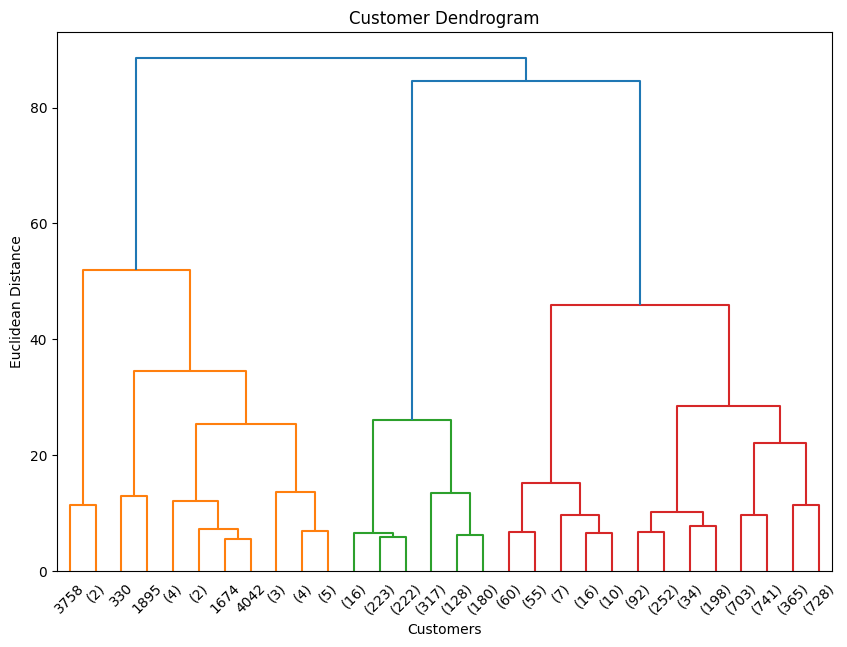

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a dendrogram
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrogram")
# 'ward' minimizes the variance of the clusters being merged.
dendro = linkage(rfm_scaled_df, method='ward')
dendrogram(dendro, truncate_mode='lastp', p=30)
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

### Insights:

---

By inspecting the dendrogram, we can identify a good number of clusters by looking for the longest vertical lines that don't cross any horizontal lines. For example, if you see two long vertical lines that would be merged at a high distance, it suggests that there are two primary clusters.

##b. Apply Hierarchical Clustering

---

 We've chosen a number of clusters (let's assume 3 for this example based on a visual inspection of a typical dendrogram), you can apply the AgglomerativeClustering algorithm.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Choose the number of clusters based on the dendrogram
num_clusters = 3

# Apply Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean', linkage='ward')
rfm_df['Cluster'] = hierarchical_model.fit_predict(rfm_scaled_df)

print(rfm_df.head())

            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346.0         326          2      0.00        2
12347.0           2          7   4310.00        1
12348.0          75          4   1797.24        1
12349.0          19          1   1757.55        1
12350.0         310          1    334.40        2


#3. Analysis and Visualization

---


Finally, Let's analyze and visualize the results to understand the characteristics of each customer segment.

##a. Profile the Clusters

---


We can calculate the mean values of Recency, Frequency, and Monetary for each cluster to understand its profile.

In [ ]:
# code to calculate mean values and customer count for each cluster
cluster_means = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
}).assign(Count=rfm_df.groupby('Cluster').size())

print(cluster_means)

            Recency  Frequency      Monetary  Count
Cluster                                            
0          6.360000  82.560000  78246.984400     25
1         40.763876   5.510580   1768.037910   3261
2        248.011050   1.985267    512.682496   1086


##b. Visualize the Clusters

---


Creating a 2D pair plot to visualize cluster separation

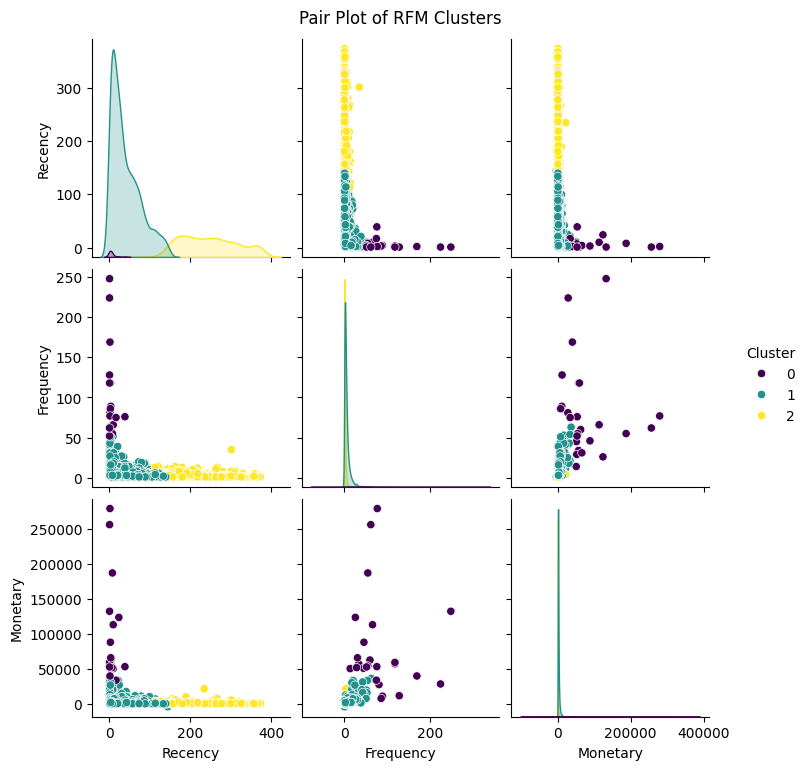

In [ ]:
import seaborn as sns
sns.pairplot(rfm_df, hue='Cluster', palette='viridis')
plt.suptitle("Pair Plot of RFM Clusters", y=1.02)
plt.show()

Creating a 3D scatter plot to visualize all three RFM dimensions

---



/tmp/ipython-input-3139866662.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(clusters))


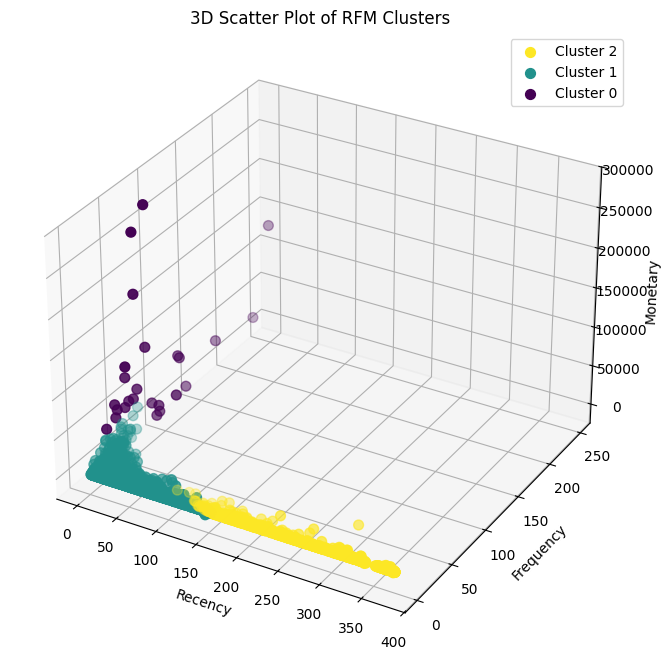

In [ ]:
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

# Get unique cluster labels
clusters = rfm_df['Cluster'].unique()

# Define a color map
colors = plt.cm.get_cmap('viridis', len(clusters))

for cluster_id in clusters:
    # Get the data for the current cluster
    cluster_data = rfm_df[rfm_df['Cluster'] == cluster_id]

    ax.scatter(cluster_data['Recency'],
               cluster_data['Frequency'],
               cluster_data['Monetary'],
               color=colors(cluster_id),
               label=f'Cluster {cluster_id}',
               s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot of RFM Clusters')
ax.legend()
plt.show()

# Insights

---

 key insights from the analysis:

### Customer Behavior Insights

Based on the cluster profiles, here's a concise summary of the insights:

* **Cluster 0: High-Value Champions:** These are your best customers—they buy recently, frequently, and spend the most. Focus on retention with loyalty programs and exclusive offers.

* **Cluster 1: At-Risk Customers:** These are former customers who haven't purchased in a long time. They have low frequency and monetary value. Your goal is to win them back with re-engagement campaigns.

* **Cluster 2: New Customers:** This segment is new and has made recent but limited purchases. Nurture them with product recommendations and special offers to encourage repeat business.

By using these insights, you can move beyond generic marketing and create targeted strategies for each customer group, increasing effectiveness and profitability.